In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
%matplotlib widget

In [338]:
def upstream_t(s, P_sol, A_q, L_conn, kappa=2000, factor=7/2, T_target=0.0): 
    print(P_sol/A_q)
    if factor != 7/2:
        target_factor = T_target**(7/2)
        q_factor = (P_sol/A_q) / L_conn
        second_factor = (s-L_conn)**2
        # print(target_factor, '{:.1e}'.format(q_factor), second_factor/kappa)
        # return (factor*(P_sol/A_q)*L_conn/kappa)**(7/2)
        return (target_factor + factor*q_factor*second_factor/kappa)**(2/7)
        # return (T_target**(7/2) + factor*(P_sol/(L_conn*A_q))*(((s-L_conn)**2) / kappa))**(2/7)
    return (T_target**(7/2) + factor * ((P_sol/A_q)*(L_conn-s)) / (kappa))**(2/7)

158.66415674629215


/tmp/ipykernel_40745/1539528811.py:10: RuntimeWarning: invalid value encountered in power
  return (T_target**(7/2) + factor * ((P_sol/A_q)*(L_conn-s)) / (kappa))**(2/7)


(0.0, 105.0)

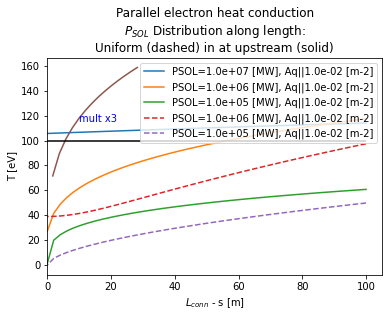

In [300]:
L = 100
radius = np.linspace(0, 100)
P_sol = 10e5
A_q = 1e-2
# print(upstream_t(0, P_sol=P_sol, A_q=A_q, L_conn=100, factor=7/4, T_target=39))

P_sol = 10e6
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, T_target=317)/3.0, label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q))
P_sol = 10e5
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, T_target=27), label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q))
P_sol = 10e4
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, T_target=1), label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q))

P_sol = 10e5
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, factor=7/4, T_target=39), label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q),  ls='--')
P_sol = 10e4
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, factor=7/4.0), label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q), ls='--')


plt.title('Parallel electron heat conduction\n$P_{SOL}$ Distribution along length:\nUniform (dashed) in at upstream (solid)')
plt.legend()
plt.xlabel('$L_{conn}$ - s [m]')
plt.ylabel('T [eV]')
plt.hlines(100, 0, 100, color='black')
plt.annotate('mult x3',xy=(10, 115), color='blue')
# plt.ylim(0, 200)
plt.xlim(0, 105)


In [290]:
major_r = 3.0
B_pol = 0.4
B_T = 2.0
lambda_q = 2/1000
q95 = 3.0

P_sol = 10e6

area = 4*np.pi*major_r*B_pol/(B_T+B_pol)*lambda_q

L_conn = np.pi*major_r*q95


print(area, L_conn)
t_sep_approx = upstream_t(0, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=0.0)
print(t_sep_approx)

0.012566370614359173 28.274333882308138
121.35409864625682


In [231]:
upstream_t(s, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=0.0)

1.75

In [377]:
def upstream_t(q_parallel, L_conn=30, kappa=2000, factor=7/2): 
    return (factor * ((q_parallel)*(L_conn)) / (kappa))**(2/7)

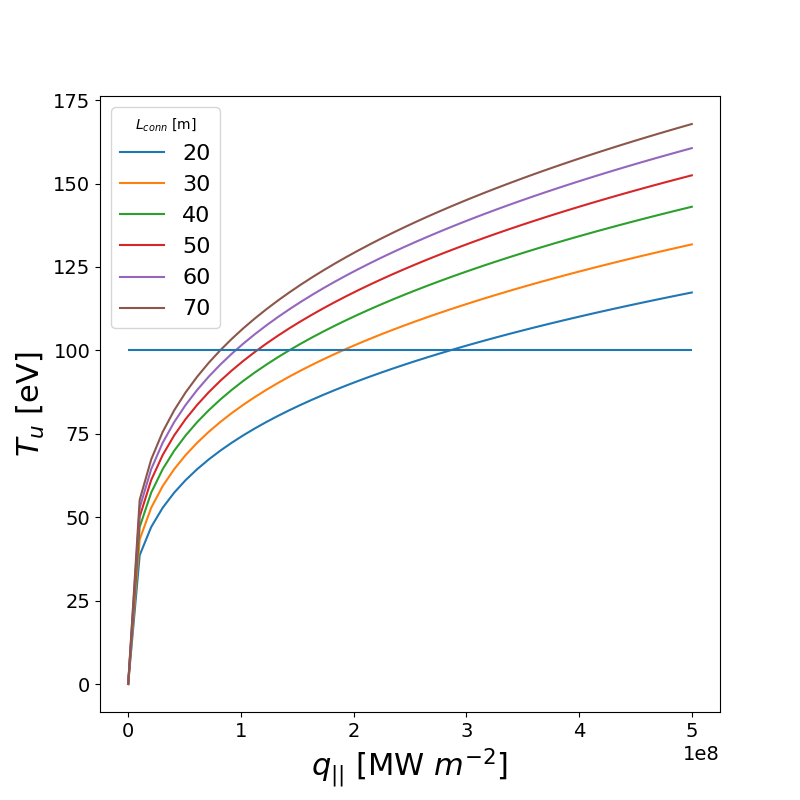

In [413]:
q_p = np.linspace(0, 5e8)
plt.close('all')
fig = plt.figure(figsize=(8, 8))
for l in [20, 30, 40, 50, 60, 70]:
    plt.plot(q_p, upstream_t(q_p, l),label=str(l))
plt.hlines(100, 0, 5e8)
plt.legend(title='$L_{conn}$ [m]')
plt.xlabel('$q_{||}$ [MW $m^{-2}$]')
plt.ylabel('$T_{u}$ [eV]')
plt.show()

961561114.5135342
156.15106457618725
961561114.5135342
994718394.3243457
163.19311049923655 31.8871654339364
994718394.3243457


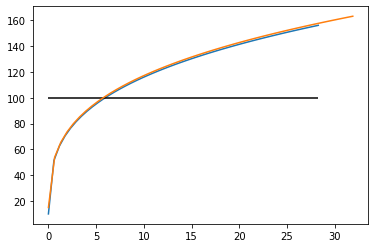

In [342]:
P_sol = 10e6

major_r = 3.0
B_pol = 0.4
B_T = 2.5
lambda_q = 2/1000
q95 = 3.0

area = 4*np.pi*major_r*B_pol/(B_T+B_pol)*lambda_q
L_conn = np.pi*major_r*q95
t_sep_approx = upstream_t(0, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=0.0)
print(t_sep_approx)
plt.close('all')
radius = np.linspace(0, L_conn)
plt.plot(L_conn - radius, upstream_t(radius, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=10.0))
plt.hlines(100, 0, L_conn, color='black')

major_r = 2.90
B_pol = 0.4
B_T = 2.5
lambda_q = 2/1000
q95 = 3.5

area = 4*np.pi*major_r*B_pol/(B_T+B_pol)*lambda_q
L_conn = np.pi*major_r*q95

t_sep_approx = upstream_t(0, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=15.0)
print(t_sep_approx, L_conn)
radius = np.linspace(0, L_conn)
plt.plot(L_conn - radius, upstream_t(radius, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=15.0))



In [10]:
from scipy.stats import truncnorm


sample_te = np.array([7.6622e+02, 7.6622e+02, 7.6622e+02, 7.8208e+02, 8.1621e+02, 8.0084e+02, 
             7.4448e+02, 6.5529e+02, 6.1443e+02, 4.8353e+02, 2.7268e+02, 1.1691e+02, 
             4.7181e+01, 1.3467e+01, 1.4703e+01, 1.2807e+01, 1.0000e-20, 3.2187e+02, 8.9688e+01])

sample_dte = np.array([6.37250671e+01, 7.58151474e+01, 8.10265732e+01, 7.80499268e+01, 7.07223740e+01, 7.81788330e+01, 
              4.02739868e+01, 4.81807480e+01, 4.30675430e+01, 6.36090164e+01, 2.81852207e+01, 4.55939407e+01,
              3.55489578e+01, 1.00000002e+20, 1.00000002e+20, 1.00000002e+20, 4.40067688e+02, 3.88090918e+03, 1.22038383e+02,])

sample_ne = np.array([4.9227e+19, 4.9227e+19, 4.9227e+19, 5.1478e+19, 5.2139e+19, 5.4267e+19, 5.1329e+19, 5.1120e+19, 4.8343e+19, 4.5789e+19, 3.9307e+19, 1.9852e+19, 8.6313e+18, 6.9721e+18, 7.2037e+18, 4.5321e+18, 1.0672e-20, 1.2613e+18,
        2.8238e+18])

sample_dne = np.array([3.25995439e+18, 5.20830302e+18, 5.82674257e+18, 4.92938331e+18, 4.67048735e+18, 4.53355307e+18, 3.37117467e+18, 4.97855127e+18,
 5.52904980e+18, 5.10963010e+18, 7.90850566e+18, 5.75338756e+18,
 1.17696771e+19, 1.00437476e+20, 1.00437476e+20, 1.00437476e+20,
 2.71353340e+18, 3.64818205e+18, 1.12065227e+19,])

sample_mask = [False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  False,  False,  False,  False,  True, False,  True]

sample_te = sample_te[sample_mask]
sample_ne = sample_ne[sample_mask]
sample_dte = sample_dte[sample_mask]
sample_dne = sample_dne[sample_mask]


1.2739074267133252e+19 100.00397606082676


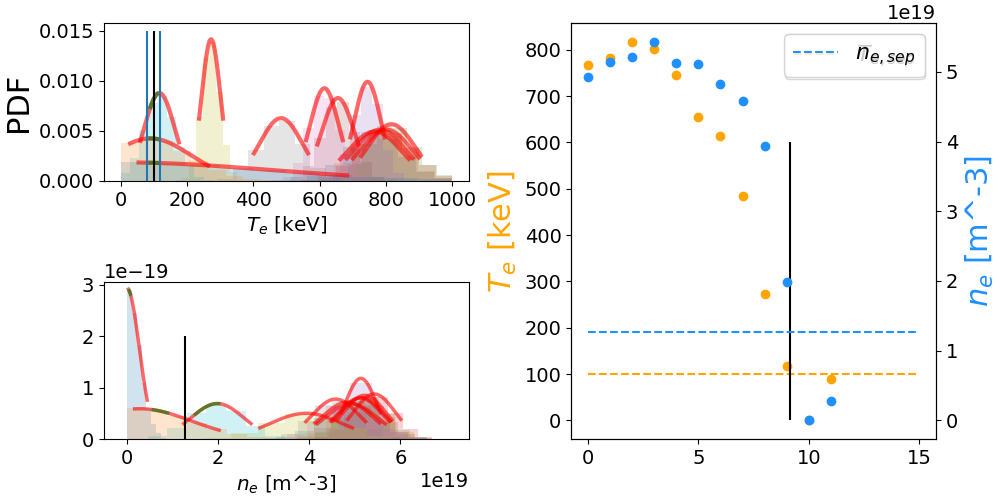

In [11]:
a,b = 80, 120
myclip_a, myclip_b = 0, 1000
from matplotlib.gridspec import GridSpec
myclip_an, myclip_bn = 0, 1e21
plt.close('all')
# fig, ax = plt.subplots(2, 2, figsize=(10, 5), constrained_layout=True)
pdfs = 0.0
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

ax = [ax1, ax2, ax3]
running_nesep, running_tesep  = [],[]
for mu, var, mu_n, var_n in zip(sample_te, sample_dte, sample_ne, sample_dne):
    
    a, b = (myclip_a - mu) / var, (myclip_b - mu) / var
    r = truncnorm.rvs(a, b, mu, var, size=10000)
    x_t = np.linspace(truncnorm.ppf(0.1, a, b, mu, var),

                    truncnorm.ppf(0.9, a, b, mu, var), 5000)
    
    x_tesep = x_t[np.logical_and(x_t>90, x_t<110)]
    ax[0].plot(x_t, truncnorm.pdf(x_t, a, b, mu, var),
           'r-', lw=3, alpha=0.6, label='truncnorm pdf')
    ax[0].plot(x_tesep, truncnorm.pdf(x_tesep, a, b, mu, var),
           'g-', lw=3, alpha=0.6, label='truncnorm pdf')
    
    running_tesep.extend(x_tesep)
        
    ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
    
    
    a, b = (myclip_an - mu_n) / var_n, (myclip_bn - mu_n) / var_n
    
    r = truncnorm.rvs(a, b, mu_n, var_n, size=10000)
    x = np.linspace(truncnorm.ppf(0.1, a, b, mu_n, var_n),

                    truncnorm.ppf(0.9, a, b, mu_n, var_n), 5000)
    
    x_tesep = x[np.logical_and(x_t>80, x_t<120)]
    
    running_nesep.extend(x_tesep)

    ax[1].plot(x, truncnorm.pdf(x, a, b, mu_n, var_n),
           'r-', lw=2.5, alpha=0.6, label='truncnorm pdf')
    ax[1].plot(x_tesep, truncnorm.pdf(x_tesep, a, b, mu_n, var_n),
           'g-', lw=2.5, alpha=0.6, label='truncnorm pdf')
        
    ax[1].hist(r, density=True, histtype='stepfilled', alpha=0.2)

print(np.array(running_nesep).mean(), np.array(running_tesep).mean())
tesep_approx = np.array(running_tesep).mean()
nesep_approx = np.array(running_nesep).mean()


ax[0].vlines(tesep_approx, 0, 0.015, color='black')
ax[0].vlines([80,120], 0, 0.015)
ax[1].vlines(nesep_approx, 0, 2e-19, color='black')
ax[1].set_xlim(-5e18, 0.75e20)

ax[2].scatter(range(len(sample_te)), sample_te, color='orange')
ax[2].hlines(tesep_approx, 0, 15, color='orange', ls='--', label='$T_{e,sep}$')
ax[2].vlines(9.15, 0, 600, color='black')
ax[0].set_ylabel('PDF')
twin_ax = ax[2].twinx()
ax[2].set_ylabel('$T_e$ [keV]', color='orange')
ax[0].set_xlabel('$T_e$ [keV]', fontsize='x-large')
twin_ax.scatter(range(len(sample_ne)), sample_ne, color='dodgerblue')

twin_ax.set_ylabel('$n_e$ [m^-3]', color='dodgerblue')
ax[1].set_xlabel('$n_e$ [m^-3]', fontsize='x-large')

twin_ax.hlines(nesep_approx, 0, 15, color='dodgerblue', ls='--', label='$n_{e, sep}$')
ax[2].legend()
twin_ax.legend()
plt.show()

In [104]:
sample_te = np.array([3.5694e+02, 3.5694e+02, 3.3003e+02, 3.1942e+02, 2.7683e+02, 2.6076e+02,
        1.8375e+02, 1.9668e+02, 1.5385e+02, 6.7422e+01, 2.5402e+01, 1.9423e+01,
        3.3411e+01, 1.0000e-20, 3.3347e+01, 2.6990e+02, 1.0000e-20, 1.0000e-20,
        3.8388e+01])
sample_dte = np.array([6.07202797e+01, 6.07202797e+01, 8.00771027e+01, 8.78397903e+01,
 7.41268692e+01, 8.06047592e+01, 6.91485367e+01, 5.56139069e+01,
 4.72044907e+01, 3.79562721e+01, 4.25981216e+01, 4.90312424e+01,
 4.76735573e+01, 1.00000002e+20, 1.92188858e+02, 1.62404678e+04,
 1.00000002e+20, 1.00000002e+20, 1.00000002e+20,])
sample_ne = np.array([4.1739e+19, 4.1739e+19, 3.9895e+19, 3.9890e+19, 3.6883e+19, 4.3824e+19,
        3.9209e+19, 3.3194e+19, 2.8044e+19, 1.5967e+19, 7.2488e+18, 8.0083e+18,
        1.8655e+18, 9.6989e-21, 1.4429e+18, 2.2658e+18, 9.6989e-21, 9.6989e-21,
        2.4407e+18])
sample_dne = np.array([3.06281993e+18, 3.06281993e+18, 5.08028523e+18, 5.63126700e+18,
                       4.75878143e+18, 4.89316759e+18, 5.09491093e+18, 4.78143137e+18,
                       4.82570651e+18, 5.63285140e+18, 5.88689411e+18, 7.19390557e+18,
                       5.63765736e+18, 9.94372104e+19, 1.03700450e+19, 3.24431164e+18,
                       9.94372104e+19, 9.94372104e+19, 9.94372104e+19,])
sample_mask = [False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
  True,  False,  True, False,  False,  False,  False]

sample_te = sample_te[sample_mask]
sample_ne = sample_ne[sample_mask]
sample_dte = sample_dte[sample_mask]
sample_dne = sample_dne[sample_mask]


1.791858241895721e+19 99.41915902283412


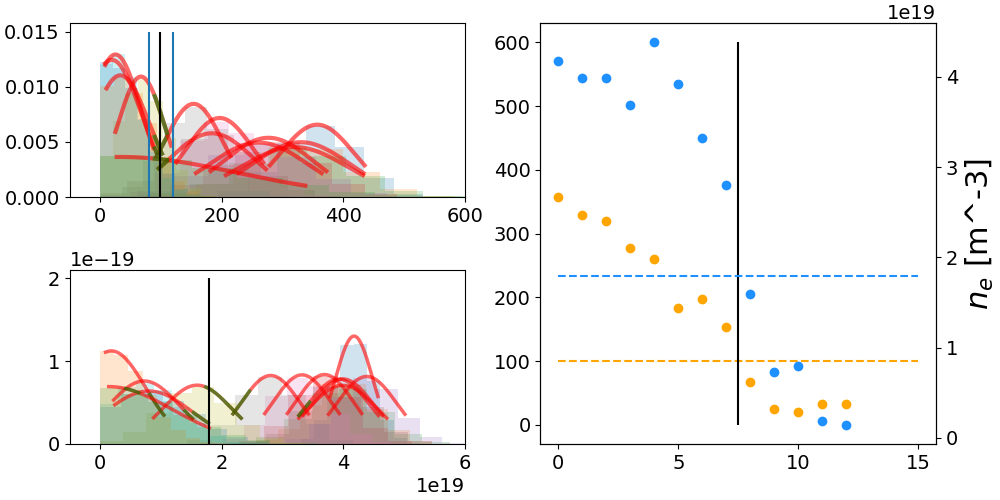

In [109]:
a,b = 80, 120
myclip_a, myclip_b = 0, 1000
from matplotlib.gridspec import GridSpec
myclip_an, myclip_bn = 0, 1e21
plt.close('all')
# fig, ax = plt.subplots(2, 2, figsize=(10, 5), constrained_layout=True)
pdfs = 0.0
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

ax = [ax1, ax2, ax3]
running_nesep, running_tesep  = [],[]
for mu, var, mu_n, var_n in zip(sample_te, sample_dte, sample_ne, sample_dne):
    
    a, b = (myclip_a - mu) / var, (myclip_b - mu) / var
    r = truncnorm.rvs(a, b, mu, var, size=10000)
    x_t = np.linspace(truncnorm.ppf(0.1, a, b, mu, var),

                    truncnorm.ppf(0.9, a, b, mu, var), 5000)
    
    x_tesep = x_t[np.logical_and(x_t>90, x_t<110)]
    ax[0].plot(x_t, truncnorm.pdf(x_t, a, b, mu, var),
           'r-', lw=3, alpha=0.6, label='truncnorm pdf')
    ax[0].plot(x_tesep, truncnorm.pdf(x_tesep, a, b, mu, var),
           'g-', lw=3, alpha=0.6, label='truncnorm pdf')
    
    running_tesep.extend(x_tesep)
        
    ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
    
    
    a, b = (myclip_an - mu_n) / var_n, (myclip_bn - mu_n) / var_n
    
    r = truncnorm.rvs(a, b, mu_n, var_n, size=10000)
    x = np.linspace(truncnorm.ppf(0.1, a, b, mu_n, var_n),

                    truncnorm.ppf(0.9, a, b, mu_n, var_n), 5000)
    
    x_tesep = x[np.logical_and(x_t>80, x_t<120)]
    
    running_nesep.extend(x_tesep)

    ax[1].plot(x, truncnorm.pdf(x, a, b, mu_n, var_n),
           'r-', lw=2.5, alpha=0.6, label='truncnorm pdf')
    ax[1].plot(x_tesep, truncnorm.pdf(x_tesep, a, b, mu_n, var_n),
           'g-', lw=2.5, alpha=0.6, label='truncnorm pdf')
        
    ax[1].hist(r, density=True, histtype='stepfilled', alpha=0.2)

print(np.array(running_nesep).mean(), np.array(running_tesep).mean())
tesep_approx = np.array(running_tesep).mean()
nesep_approx = np.array(running_nesep).mean()


ax[0].vlines(tesep_approx, 0, 0.015, color='black')
ax[0].vlines([80,120], 0, 0.015)
ax[1].vlines(nesep_approx, 0, 2e-19, color='black')
ax[1].set_xlim(-5e18, 6e19)

ax[2].scatter(range(len(sample_te)), sample_te, color='orange')
ax[2].hlines(tesep_approx, 0, 15, color='orange', ls='--')
ax[2].vlines(7.5, 0, 600, color='black')
ax[0].set_xlim(-50,600)
twin_ax = ax[2].twinx()
twin_ax.scatter(range(len(sample_ne)), sample_ne, color='dodgerblue')



twin_ax.hlines(nesep_approx, 0, 15, color='dodgerblue', ls='--')
twin_ax.set_ylabel('$n_e$ [m^-3]')
plt.show()